<a href="https://colab.research.google.com/github/krutika234/BSE__IIT-PATNA_OPTIMIZATION-2021/blob/main/Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutorial on Portfolio Optimization 

#### Modern Portfolio Theory (MPT)
##### A ground breaking research in the field of economic and finance in the year 1952 proposed by Harry Markowitz’s. It was proposed to  get an idea on how to select your portfolio which can give you maximum return with the given level of risk. 
##### One of the important idea about MPT was instead of calculating individual risk and return of the assets. Its better to see the overall perfomrnace of a portfolio. 
 ***The assumptions of MPT, thus, emphasise that investors only assume additional risk when there is a possibility of higher expected returns — “High risk, High Reward”***





####################################################################################################
##### In this program we have used quandl to get the actual price of the share. But used random weights to optimize our portfolio. 
##### if you dont want to opt for quandl and keep things little bit simple, then you can intialize the assests in the portfolio randomly. 


                                # step wise explaination

##### 1. Import all the required libraries. Quandl is the new library to be installed 
##### 2. To install qundle  :- pip install quandl (for python),  conda install -c anaconda quandl (for anaconda users)
##### 3. After installing quandl, register with the website https://data.nasdaq.com/. To get your API key. (Beware of the volume limit)
##### 4. Here we used fivethirtyeight styling for plot, It is a website which used a different plotting style. 
##### 5. While config the api for quandl "Insert your api key".
##### 6. After collecting data, rearrange the data with respect to tickers. 
##### 7. Plot the price with respect to the time from line 
##### 8. pct_change function from pandas will find the percenatge change in the data over the time period.
##### 9. Function random_weights will generate the random weights for each assest which is sum upto 1. assuming our overall alloted budget. For the portfolio is one. 
##### 10. Function portfolio_annualised_performance will calulate the annual mean and standard deviation for the given portfolio with the set of weights 
##### 11. will call the above function for q times.
##### 12. After calculation the overall min and standard deviation for q portfolios, we can plot it to the see the volatility 


###############################################################################



# markowitz portfolio management



In [ ]:

%matplotlib inline
!pip install quandl # for installing the library

# importing of libraries 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import quandl


In [ ]:
# global variables 
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []


In [ ]:
# randomly generate weights 
def random_weights(n):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    return weights

#### The portfolio annualised perfomance will consider different sets of randomly generated weights calculate the mean, standar deviation, sharpe ratio of the portfolio annually 

In [ ]:

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    global trade_days 

    returns = np.sum(mean_returns*weights ) *trade_days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trade_days)
    sharpe = returns / std
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(std)
    stock_weights.append(weights)

#### After defining a function we need to collect data to do processing. For that we will use quandl 


Enter the qunadl API keyDN2wVVn8-PAR-fXcUeG5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       236 non-null    datetime64[ns]
 1   ticker     236 non-null    object        
 2   adj_close  236 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.7+ KB
               AAPL     AMZN        FB    GOOGL
date                                           
2018-01-02  172.260  1189.01  181.4200  1073.21
2018-01-03  172.230  1204.20  184.6700  1091.52
2018-01-04  173.030  1209.59  184.3300  1095.76
2018-01-05  175.000  1229.14  186.8500  1110.29
2018-01-08  174.350  1246.87  188.2800  1114.21
2018-01-09  174.330  1252.70  187.8700  1112.79
2018-01-10  174.290  1254.33  187.8400  1110.14
2018-01-11  175.280  1276.68  187.7700  1111.88
2018-01-12  177.090  1305.20  179.3700  1130.65
2018-01-16  176.1

Text(0, 0.5, 'daily returns')

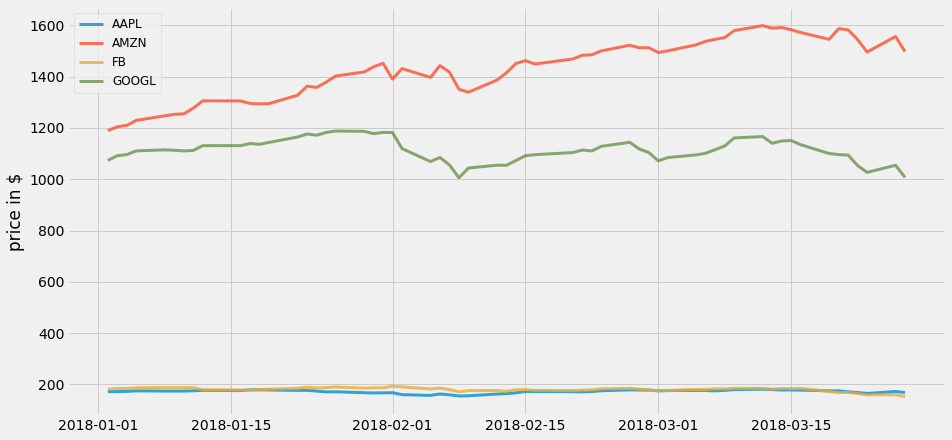

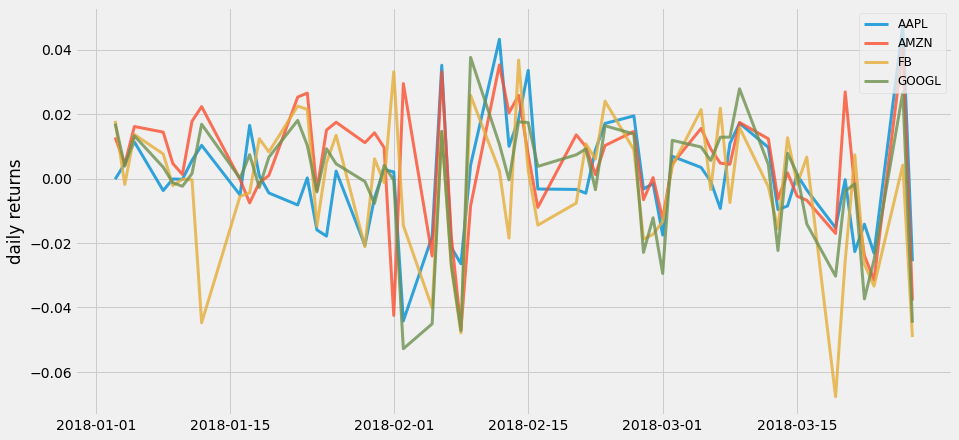

In [ ]:
    your_api = input("Enter the qunadl API key" )
    plt.style.use('fivethirtyeight')
    np.random.seed(777)
    
    #%config InlineBackend.figure_format = 'retina'
    quandl.ApiConfig.api_key =  'DN2wVVn8-PAR-fXcUeG5'
    stocks = ['AAPL','AMZN','GOOGL','FB'] # selected stocks (can update the stocks here). 
    data = quandl.get_table('WIKI/PRICES', ticker = stocks, qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
    date = { 'gte': '2018-1-1', 'lte': '2019-12-31' }, paginate=True) # collected data in the stated duration of the time 
    data.head()
    data.info()
    # data consist of date, abbreviated form of the stock and closing price. 

    df = data.set_index('date')
    table = df.pivot(columns='ticker')
    # By specifying col[1] in below list comprehension
    # You can select the stock names under multi-level column
    table.columns = [col[1] for col in table.columns]
    table.head()

    print(table)
    plt.figure(figsize=(14, 7))
    for c in table.columns.values:
        plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel('price in $')


    returns = table.pct_change()
    plt.figure(figsize=(14, 7))
    for c in returns.columns.values:
        plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')

#### calculating the mean and covaraince on the actual price on the stock 



In [ ]:

mean_returns = returns.mean() # mean for each assest 
cov_matrix = returns.cov() # covaraiance matrix for each asset 
n_portfolios = 1000 # random no of portfolios to be considered for analysis 
trade_days =252 # no of trading days in an year 
    
for i in range(n_portfolios):
    portfolio_annualised_performance(random_weights(len(stocks)),mean_returns, cov_matrix)

In [ ]:

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [ ]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
    


In [ ]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
# get better labels for desired arrangement of columns    
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]
df = df[column_order]

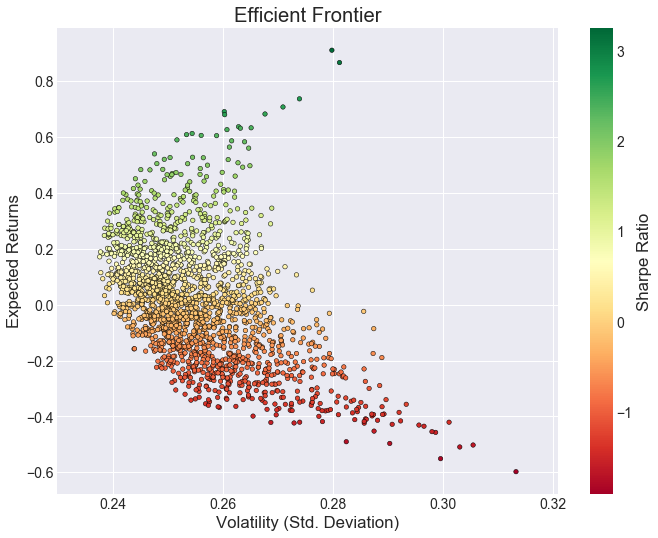

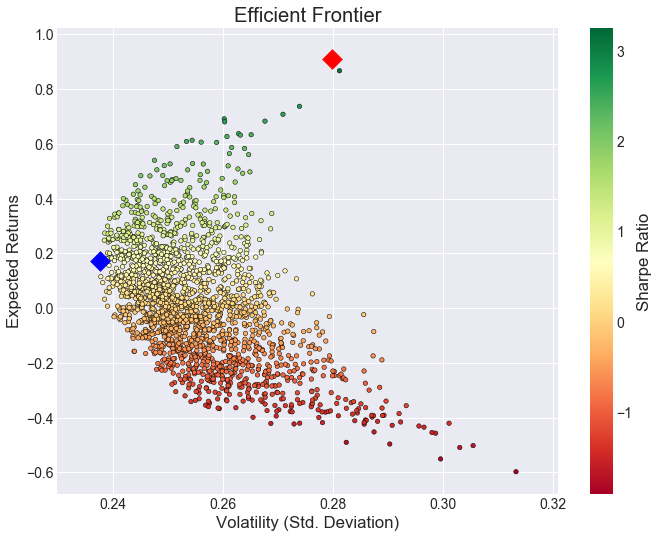

                   417
Returns       0.171209
Volatility    0.237604
Sharpe Ratio  0.720563
AAPL Weight   0.461477
AMZN Weight   0.327416
GOOGL Weight  0.195238
FB Weight     0.015869
                   363
Returns       0.910671
Volatility    0.279848
Sharpe Ratio  3.254163
AAPL Weight   0.076873
AMZN Weight   0.889352
GOOGL Weight  0.014134
FB Weight     0.019641


In [ ]:
# for plotting 

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

print(min_variance_port.T)
print(sharpe_portfolio.T)

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


    
    
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks) )
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record
    


In [42]:
  def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
    
  def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

In [45]:
  
  def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
        p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        return -(p_ret - risk_free_rate) / p_var

  
  def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

  def portfolio_volatility(weights, mean_returns, cov_matrix):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

In [ ]:
def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]
        constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = tuple((0,1) for asset in range(num_assets))
        result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
        return result
    
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.82
Annualised Volatility: 0.27


             AAPL   AMZN    FB  GOOGL
allocation  15.49  81.35  1.92   1.23
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.24


             AAPL   AMZN     FB  GOOGL
allocation  45.83  32.21  19.85   2.11


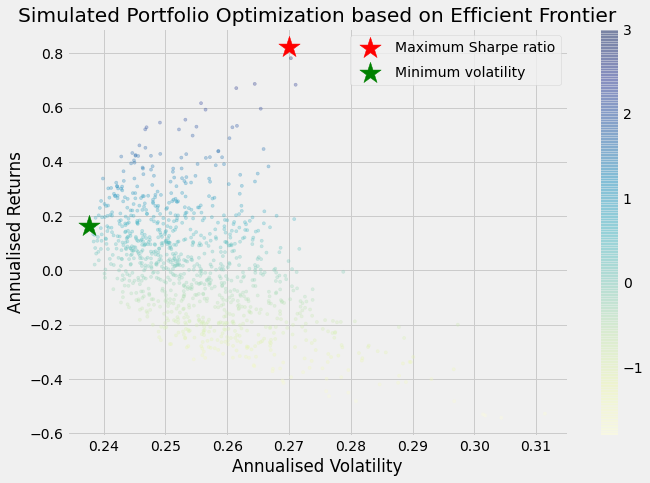

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
      results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
      
    
      max_sharpe_idx = np.argmax(results[2])
   
      sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
      max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
      max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
      max_sharpe_allocation = max_sharpe_allocation.T
    
      min_vol_idx = np.argmin(results[0])
      sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
      min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
      min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
      min_vol_allocation = min_vol_allocation.T
    
      print ("-"*80)
      print ("Maximum Sharpe Ratio Portfolio Allocation\n")
      print ("Annualised Return:", round(rp,2))
      print ("Annualised Volatility:", round(sdp,2))
      print ("\n")
      print (max_sharpe_allocation)
      print ("-"*80)
      print ("Minimum Volatility Portfolio Allocation\n")
      print ("Annualised Return:", round(rp_min,2))
      print ("Annualised Volatility:", round(sdp_min,2))
      print ("\n")
      print (min_vol_allocation)
    
      plt.figure(figsize=(10, 7))
      plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
      plt.colorbar()
      plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
      plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
      plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
      plt.xlabel('Annualised Volatility')
      plt.ylabel('Annualised Returns')
      plt.legend(labelspacing = 0.8)

returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 1000
risk_free_rate = 0.01136
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)
    

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.05
Annualised Volatility: 0.29


            AAPL   AMZN   FB  GOOGL
allocation   0.0  100.0  0.0    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.15
Annualised Volatility: 0.24


             AAPL   AMZN     FB  GOOGL
allocation  49.48  30.76  19.76    0.0


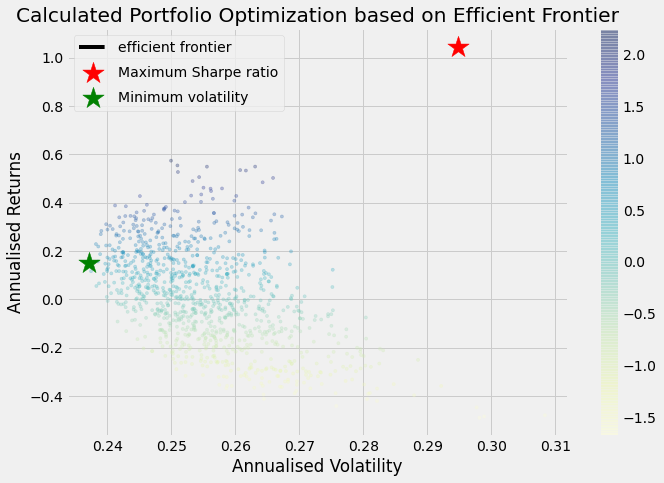

In [47]:
    def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
        results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
        max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
        sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
        max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
        max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
        max_sharpe_allocation = max_sharpe_allocation.T
    
        min_vol = min_variance(mean_returns, cov_matrix)
        sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
        min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation = min_vol_allocation.T
    
        print ("-"*80)
        print ("Maximum Sharpe Ratio Portfolio Allocation\n")
        print ("Annualised Return:", round(rp,2))
        print ("Annualised Volatility:", round(sdp,2))
        print ("\n")
        print (max_sharpe_allocation)
        print ("-"*80)
        print ("Minimum Volatility Portfolio Allocation\n")
        print ("Annualised Return:", round(rp_min,2))
        print ("Annualised Volatility:", round(sdp_min,2))
        print ("\n")
        print (min_vol_allocation)
    
        plt.figure(figsize=(10, 7))
        plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
        plt.colorbar()
        plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
        plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
        target = np.linspace(rp_min, 0.40, 50)
        efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
        plt.plot([p for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
        plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
        plt.xlabel('Annualised Volatility')
        plt.ylabel('Annualised Returns')
        plt.legend(labelspacing = 0.8)


returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 1000
risk_free_rate = 0.01136
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)